# Plot the ramen data with Seaborn

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 1. Read the data from the CSV file into a DataFrame and display the first five rows.

# ramen-ratings file is in the local working directory
file_path = 'ramen-ratings.csv'

# Use pandas to read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


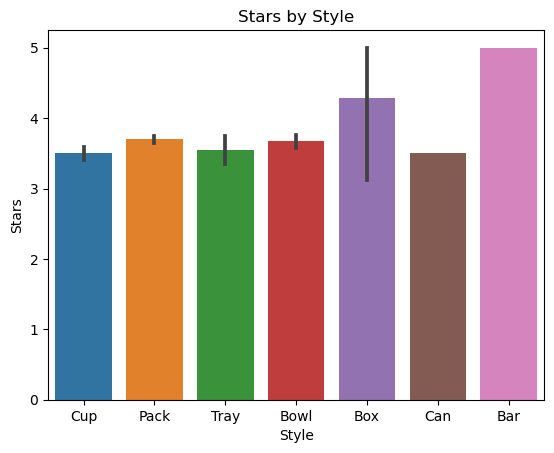

In [3]:
# 2. Create a bar plot to show the Stars by Style with a Seaborn specific method.

sns.barplot(x='Style', y='Stars', data=df)

# Set plot labels and title
plt.xlabel('Style')
plt.ylabel('Stars')
plt.title('Stars by Style')

# Show the plot
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


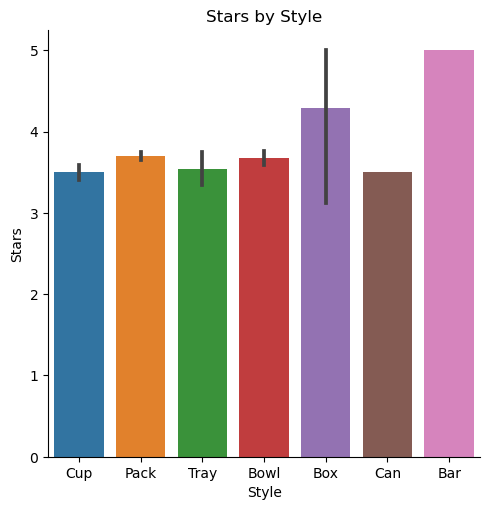

In [4]:
# 3. Create a bar plot to show the Stars by Style with a Seaborn generic method.

sns.catplot(x='Style', y='Stars', kind='bar', data=df)

# Set plot labels and title
plt.xlabel('Style')
plt.ylabel('Stars')
plt.title('Stars by Style')

# Show the plot
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


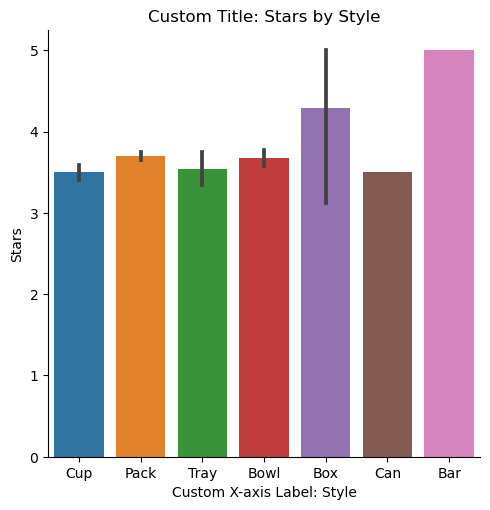

In [5]:
# 4. Modify the plot you just created to use a custom title and x-axis label.
sns.catplot(x='Style', y='Stars', kind='bar', data=df)

# Set custom plot title and x-axis label
plt.title('Custom Title: Stars by Style')
plt.xlabel('Custom X-axis Label: Style')

# Show the plot
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


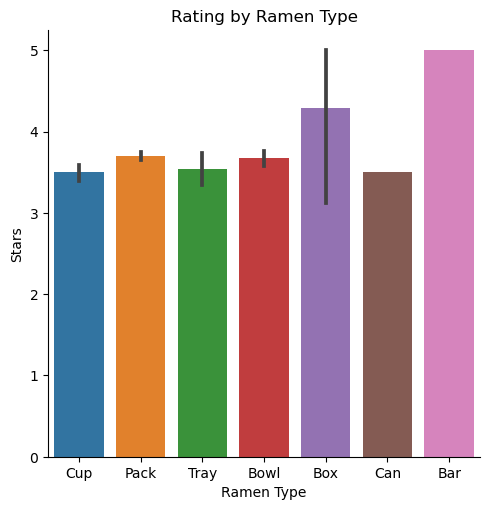

In [10]:
# OR use Seaborn ax.set



g = sns.catplot(data=df, x='Style', y='Stars', kind='bar')
for ax in g.axes.flat:
    ax.set(title='Rating by Ramen Type', xlabel='Ramen Type')



/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


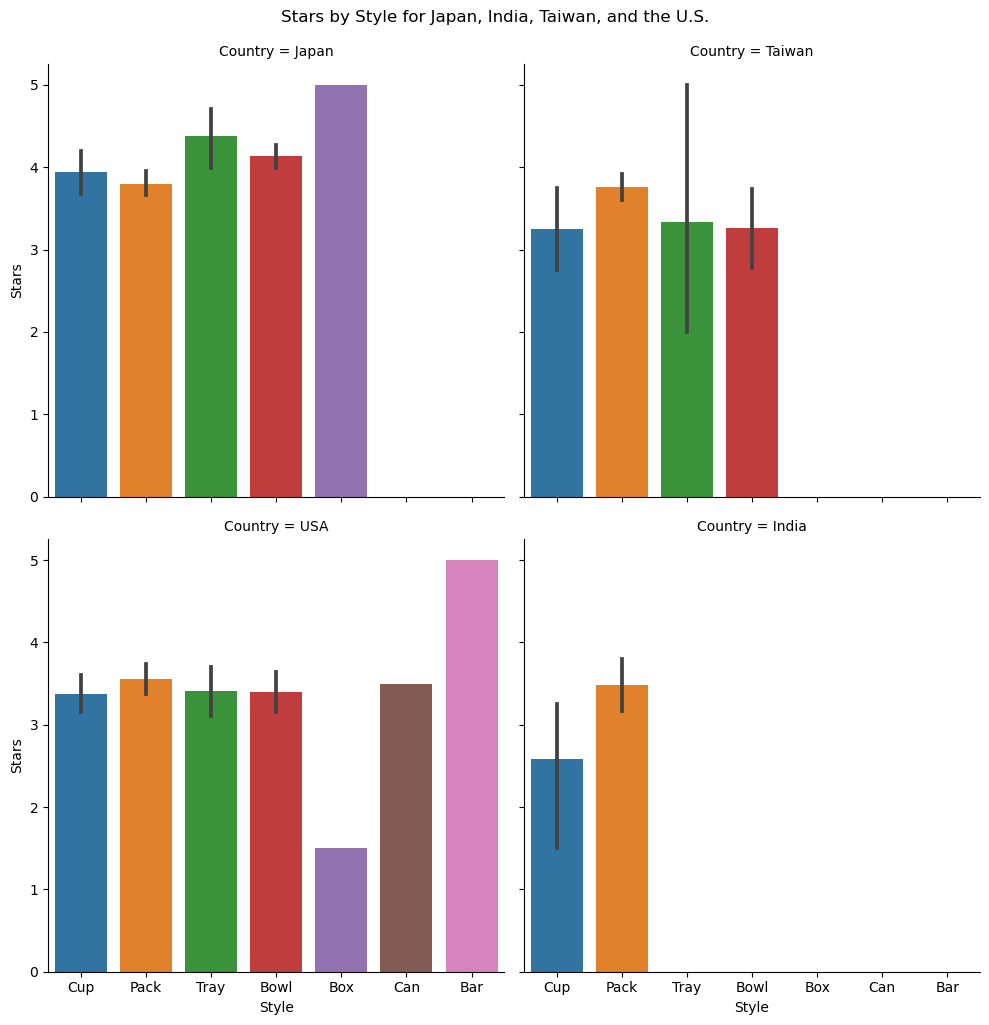

In [6]:
#5. Use the query() method to filter the data to contain only data for Japan, India, Taiwan,
# and the U.S. Plot the stars by style for each country on a subplot with two subplots per row.

# List of countries to filter
countries_to_plot = ['Japan', 'India', 'Taiwan', 'USA']

# Use the query() method to filter the data
filtered_df = df.query("Country in @countries_to_plot")

# Create a facet grid with two subplots per row
g = sns.catplot(x='Style', y='Stars', col='Country', kind='bar', data=filtered_df, col_wrap=2)

# Set custom plot title and x-axis label
g.fig.suptitle('Stars by Style for Japan, India, Taiwan, and the U.S.', y=1.02)
g.set_axis_labels('Style', 'Stars')

# Show the plot
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


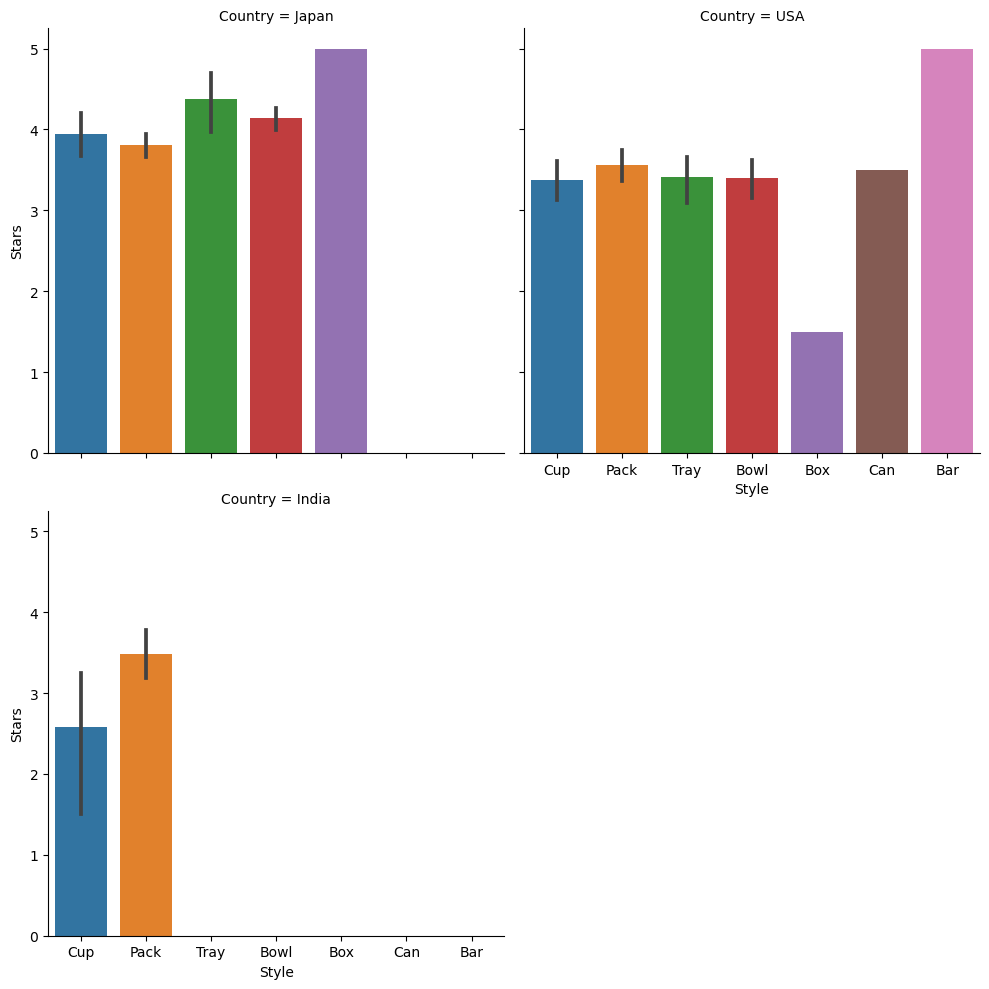

In [13]:
# OR use 
g = sns.catplot(data=df.query('Country in ["Japan", "India", "Tiwan,", "USA"]'), x='Style', y='Stars', kind='bar', col='Country', col_wrap=2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/6q/0n2ckzv123v3y8qcqf864bp80000gn/T/ipykernel_54845/3786629402.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


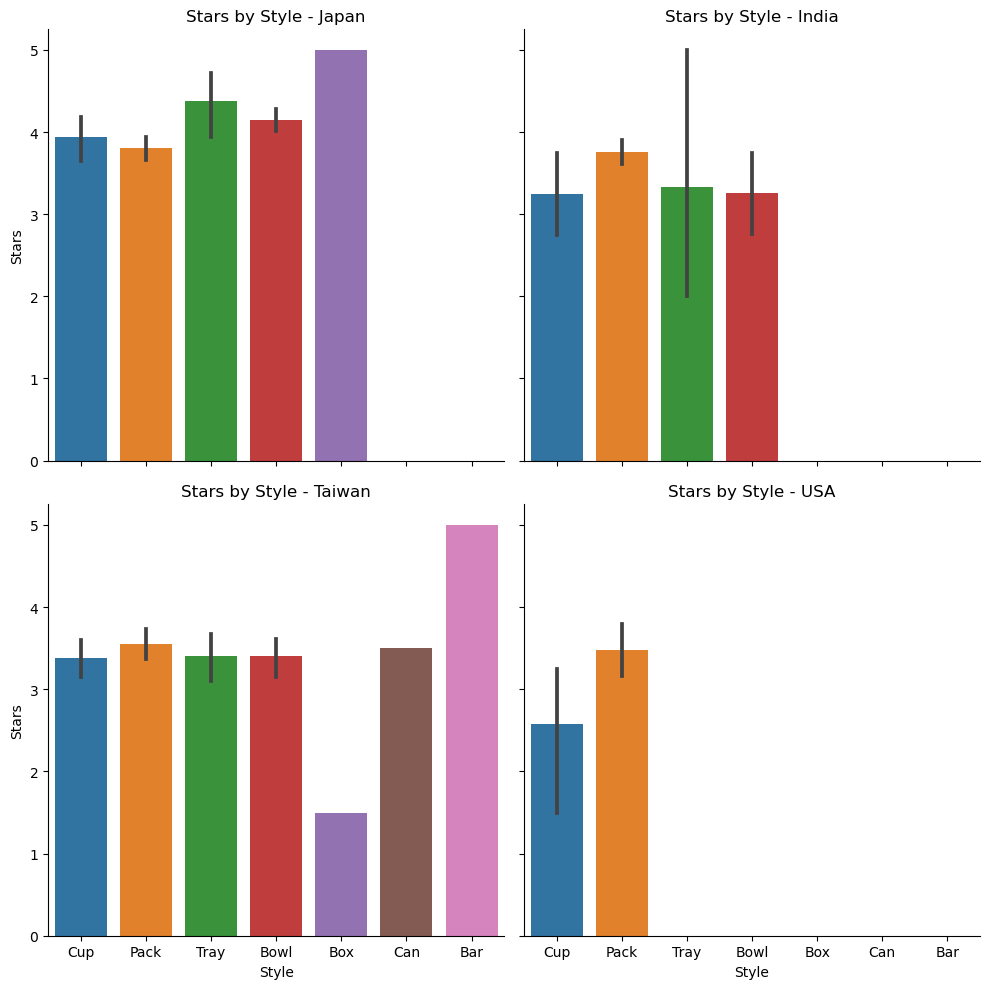

In [7]:
# 6. Modify the plot you just created to have a custom title for each subplot. Hint: Use the enumerate() method.

# List of countries to filter
countries_to_plot = ['Japan', 'India', 'Taiwan', 'USA']

# Use the query() method to filter the data
filtered_df = df.query("Country in @countries_to_plot")

# Create a facet grid with two subplots per row
g = sns.catplot(x='Style', y='Stars', col='Country', kind='bar', data=filtered_df, col_wrap=2)

# Set custom plot title and x-axis label for each subplot
for ax, country in zip(g.axes.flat, countries_to_plot):
    ax.set_title(f'Stars by Style - {country}')
    ax.set(xlabel='Style', ylabel='Stars')

# Adjust the layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


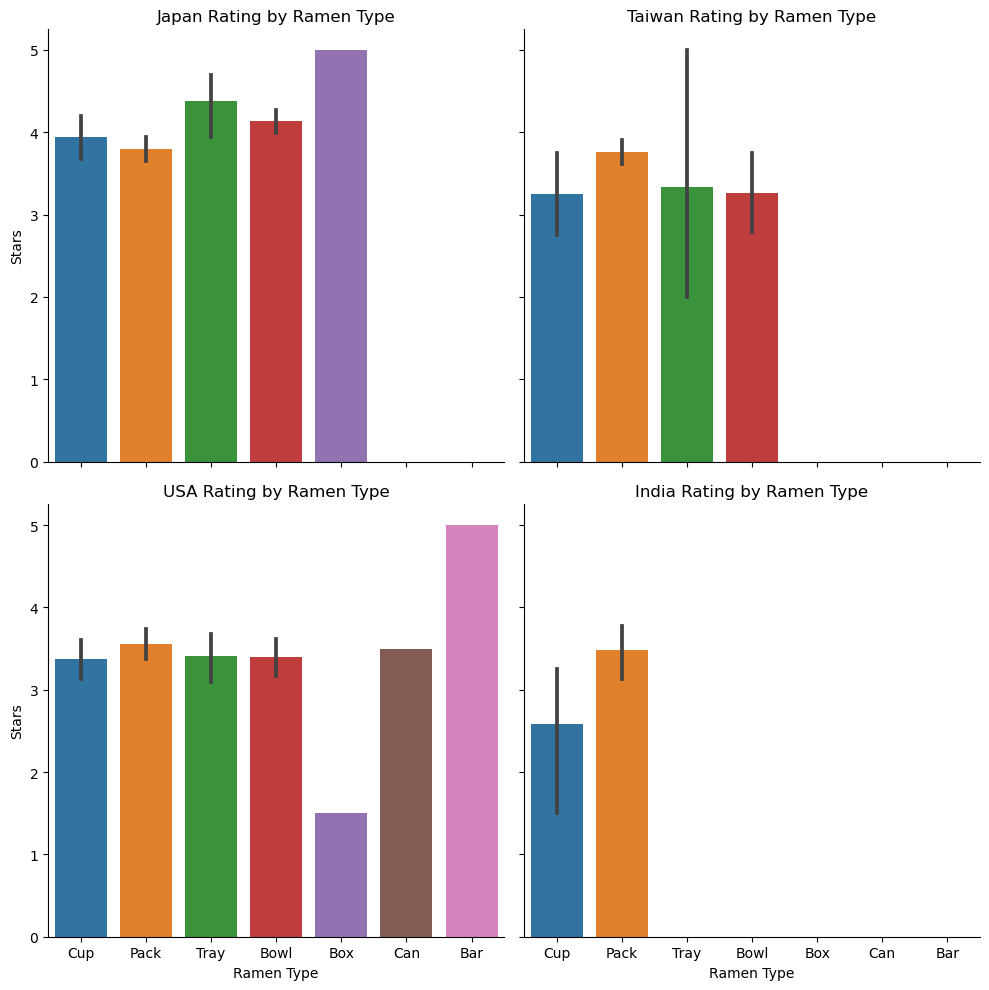

In [16]:
# OR 

g = sns.catplot(data=df.query('Country in ["Japan","India","Taiwan","USA"]'), 
                x='Style', y='Stars', kind='bar', col='Country', col_wrap=2)
countries = df.query('Country in ["Japan","India","Taiwan","USA"]').Country.unique()
for i, ax in enumerate(g.axes.flat):
    ax.set(title=countries[i] + ' Rating by Ramen Type', xlabel='Ramen Type')